# 43 Creating LineStrings from PyVista Contour Lines

PyVista has the capability to create contour lines from a mesh using the built-in ``contours`` function. It may be desirable to visualize these contour lines again in 2D within a GIS environment. The functionality to convert PyVista contour lines into Shapely LineStrings and GeoDataFrames was hence implemented in GemGIS.

<img src="../images/tutorial43_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import gemgis as gg

file_path ='data/43_create_linestrings_from_pyvista_contours/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="43_create_linestrings_from_pyvista_contours.zip", dirpath=file_path)

## Loading Mesh

In [2]:
import pyvista as pv

mesh = pv.read(file_path + 'surf.vtk')
mesh

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


PolyData (0x2195cf28700)
  N Cells:	45536
  N Points:	23009
  X Bounds:	3.233e+07, 3.250e+07
  Y Bounds:	5.702e+06, 5.798e+06
  Z Bounds:	-2.450e+03, 4.000e+02
  N Arrays:	1

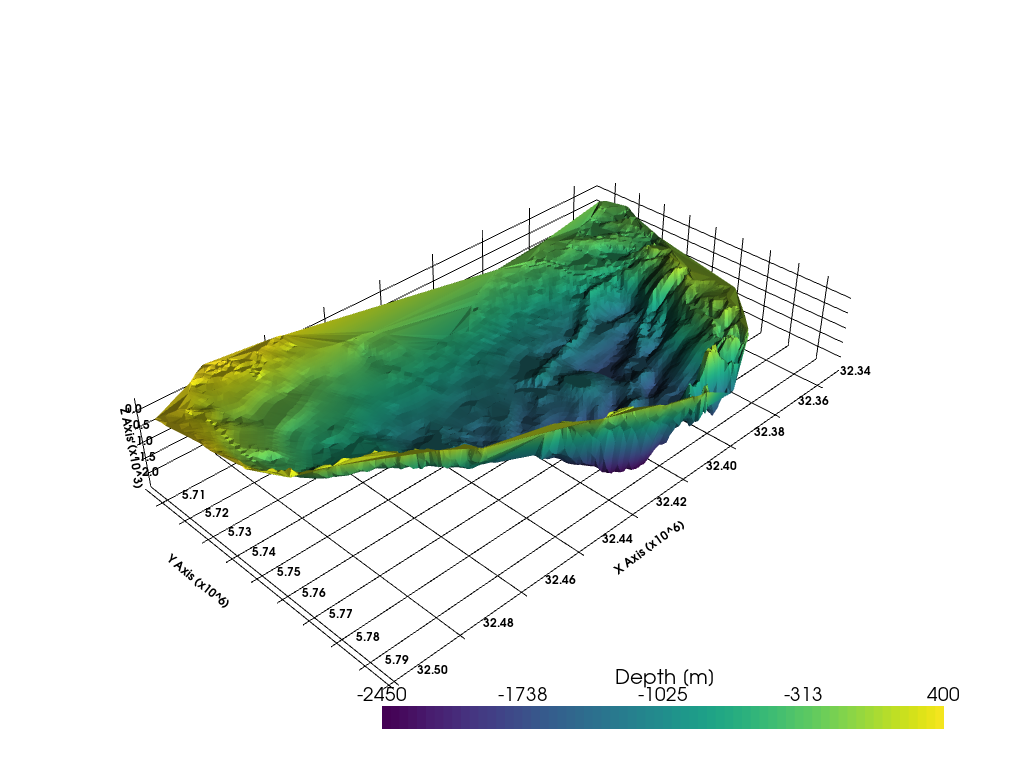

In [3]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, scalars='Depth [m]', scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

## Calculating Contours

The contours can be calculated with the built-in ``contour(..)`` function in PyVista. Isosurfaces are defined every 50 meters.

In [4]:
import numpy as np
contours = mesh.contour(isosurfaces=np.arange(-2450, 400,50))
contours

PolyData (0x219622267c0)
  N Cells:	36337
  N Points:	36178
  X Bounds:	3.233e+07, 3.250e+07
  Y Bounds:	5.704e+06, 5.798e+06
  Z Bounds:	-2.400e+03, 3.500e+02
  N Arrays:	1

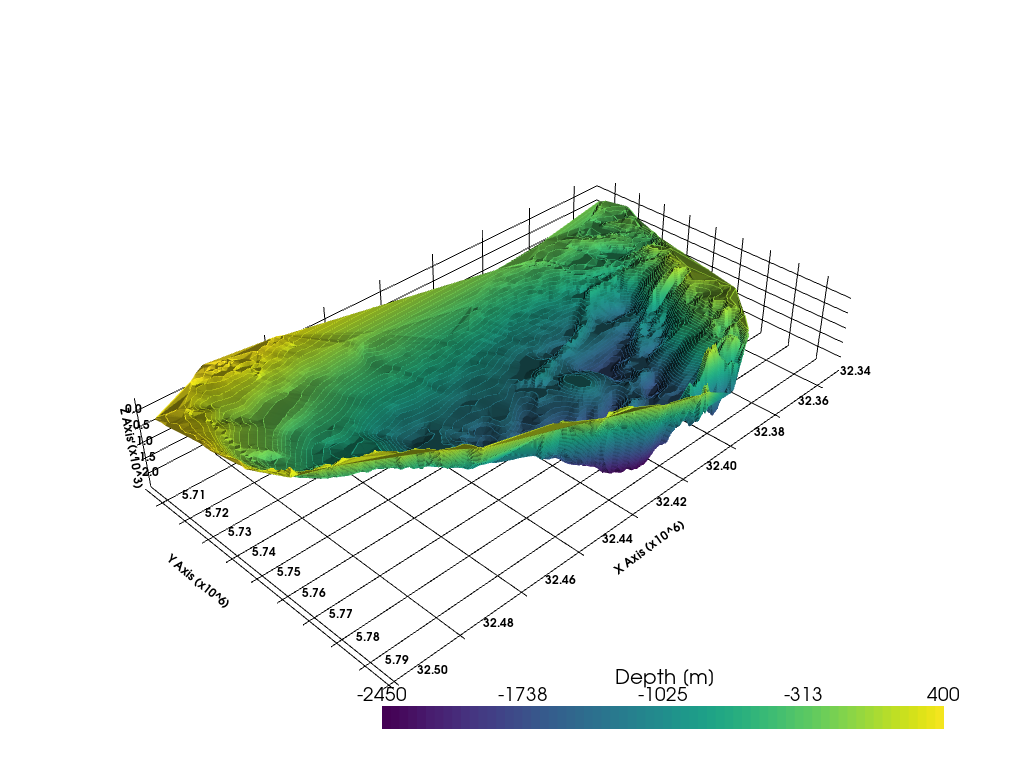

In [5]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh, scalars='Depth [m]', scalar_bar_args=sargs)
p.add_mesh(contours, scalars='Depth [m]', scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

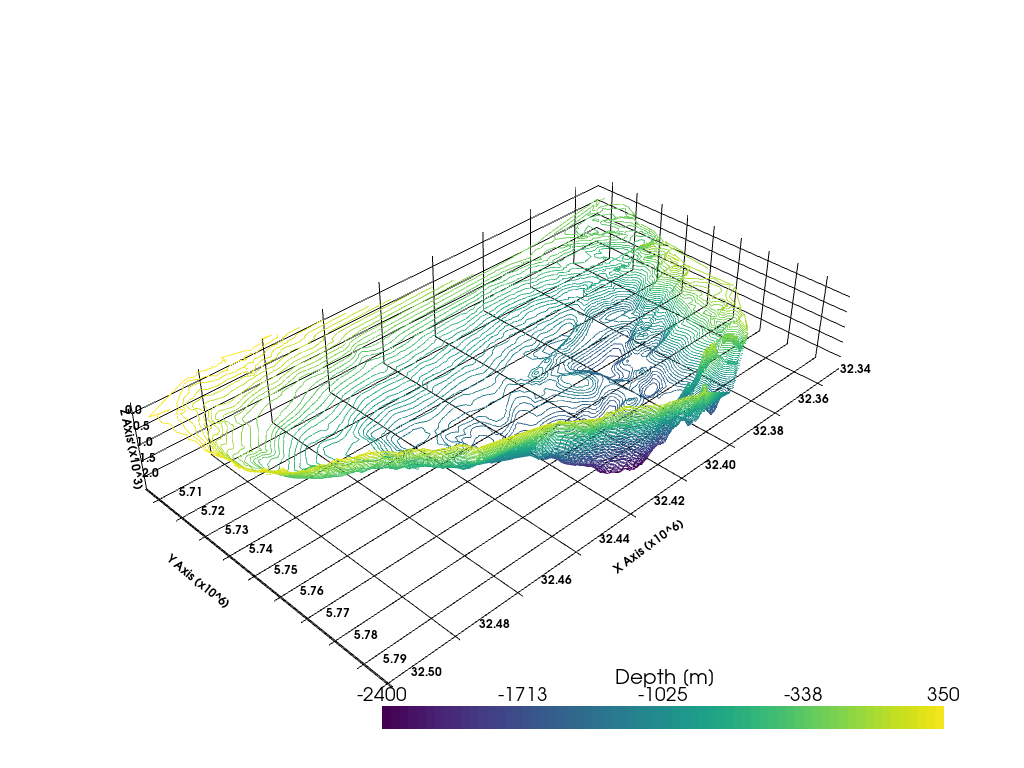

In [6]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(contours, scalars='Depth [m]', scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()

## Extracting LineStrings

The LineStrings can be extracted using ``create_linestrings_from_contours(..)``. If the results are returned as GeoDataFrame, a CRS can be set for the gdf.

In [7]:
gdf_linestrings = gg.vector.create_linestrings_from_contours(contours=contours, return_gdf=True, crs='EPSG:4647')
gdf_linestrings

,geometry,Z
0,LINESTRING Z (32409587.930 5780538.824 -2350.0...,-2350.00
1,LINESTRING Z (32407304.336 5777048.086 -2050.0...,-2050.00
2,LINESTRING Z (32408748.977 5778005.047 -2200.0...,-2200.00
3,LINESTRING Z (32403693.547 5786613.994 -2400.0...,-2400.00
4,LINESTRING Z (32404738.664 5782672.480 -2350.0...,-2350.00
...,...,...
36332,LINESTRING Z (32472712.875 5705828.297 350.000...,350.00
36333,LINESTRING Z (32476371.684 5706520.105 350.000...,350.00
36334,LINESTRING Z (32476542.145 5706398.895 350.000...,350.00
36335,LINESTRING Z (32476538.465 5706556.277 350.000...,350.00


In [8]:
gdf_linestrings.crs

<Projected CRS: EPSG:4647>
Name: ETRS89 / UTM zone 32N (zE-N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Germany - 6°E to 12°E
- bounds: (6.0, 47.27, 12.0, 55.47)
Coordinate Operation:
- name: UTM zone 32N with prefix
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Plotting the LineStrings

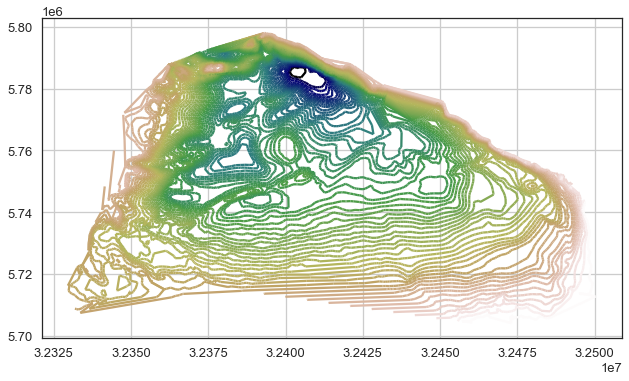

In [9]:
import matplotlib.pyplot as plt

gdf_linestrings.plot(column = 'Z', cmap = 'gist_earth')
plt.grid()